## PCA through Singular Value Decomposition

In [38]:
import numpy as np
# Defined 3 points in 2D-space:
X=np.array([[2, 1, 0],[4, 3, 0]])

# Calculate the covariance matrix:
R = np.matmul(X,X.T)/3

# Calculate the SVD decomposition and new basis vectors:
[U,D,V]=np.linalg.svd(R)  # call SVD decomposition
u1=U[:,0] # First principal direction
u2=U[:,1] # Second principal direction

# Calculate the coordinates in new orthonormal basis:

X11 = np.matmul(np.transpose(X),u1) # Projection onto u1
X12 = np.matmul(np.transpose(X),u2) # Projection onto u2
print(X11)
print(X12)

# Calculate the approximation of the original from new basis
#print(Xi1[:,None]) # add second dimention to array and test it
X_approx = np.matmul(u1[:, None], X11[None, :]) + np.matmul(u2[:, None], X12[None, :])


# Check that you got the original
print(X_approx)

[-4.46716435 -3.14809647  0.        ]
[-0.21081425  0.29914646  0.        ]
[[2. 1. 0.]
 [4. 3. 0.]]



# PCA on Iris data

In [5]:
# Load Iris dataset as in the last PC lab:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[:])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


<function matplotlib.pyplot.show(close=None, block=None)>

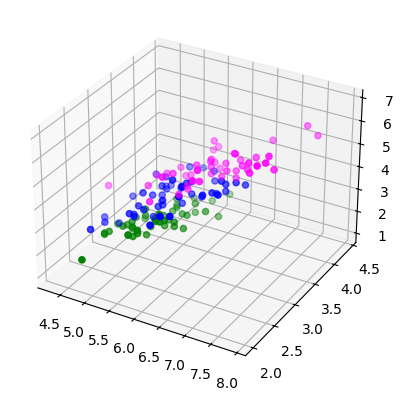

In [39]:

# We have 4 dimensions of data, plot the first three colums in 3D
X=iris.data
y=iris.target

import matplotlib.pyplot as plt
axes1=plt.axes(projection='3d')
axes1.scatter3D(X[y==0,0],X[y==0,1],X[y==0,2],color='green')
axes1.scatter3D(X[y==1,0],X[y==1,1],X[y==1,2],color='blue')
axes1.scatter3D(X[y==2,0],X[y==2,1],X[y==2,2],color='magenta')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

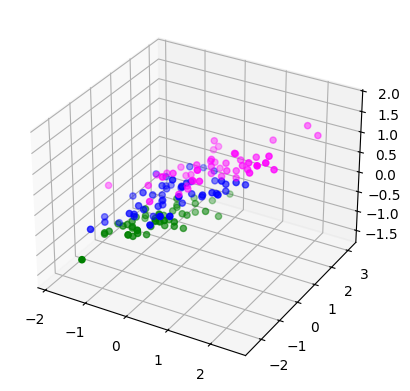

In [17]:
# Pre-processing is an important step; we can use:
# - StandardScaler: Normalizes data to have zero mean and unit variance.
# - MinMaxScaler: Scales data to the range [0,1].

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
Xscaler = StandardScaler() # Initialize the StandardScaler
Xpp=Xscaler.fit_transform(X) # Standardized feature values

# you can plot the transformed feature space in 3D:
axes2=plt.axes(projection='3d')
axes2.scatter3D(Xpp[y==0,0],Xpp[y==0,1],Xpp[y==0,2],color='green')
axes2.scatter3D(Xpp[y==1,0],Xpp[y==1,1],Xpp[y==1,2],color='blue')
axes2.scatter3D(Xpp[y==2,0],Xpp[y==2,1],Xpp[y==2,2],color='magenta')
plt.show

[[ 0.05290845 -0.00491134  0.05999602  0.05975355]
 [-0.00491134  0.03298254 -0.02328082 -0.02111795]
 [ 0.05999602 -0.02328082  0.08952249  0.09149784]
 [ 0.05975355 -0.02111795  0.09149784  0.10086914]]


<function matplotlib.pyplot.show(close=None, block=None)>

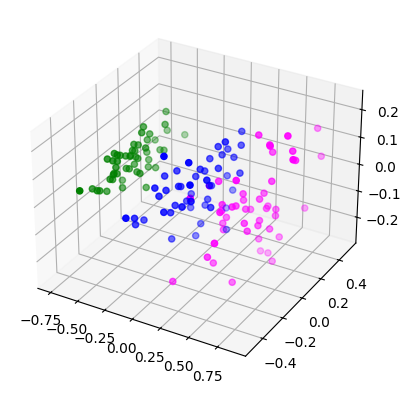

In [37]:
# Pre-processing is an important step, you can try either StandardScaler (zero mean, unit variance of features)
# or MinMaxScaler (to interval from 0 to 1)
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.preprocessing import MinMaxScaler
Xscaler = MinMaxScaler()
Xpp=Xscaler.fit_transform(X)

# define PCA object (three components), fit and transform the data
pca = decomposition.PCA(n_components=3)
pca.fit(Xpp) # Fit PCA to the scaled data
Xpca = pca.transform(Xpp) # Transform the data to the new PCA space
print(pca.get_covariance())
# you can plot the transformed feature space in 3D:
axes2=plt.axes(projection='3d')
axes2.scatter3D(Xpca[y==0,0],Xpca[y==0,1],Xpca[y==0,2],color='green')
axes2.scatter3D(Xpca[y==1,0],Xpca[y==1,1],Xpca[y==1,2],color='blue')
axes2.scatter3D(Xpca[y==2,0],Xpca[y==2,1],Xpca[y==2,2],color='magenta')
plt.show

In [22]:
pca.explained_variance_ #returns the variance explained by each of the principal components in the PCA model.

array([2.93808505, 0.9201649 , 0.14774182])

In [23]:
pca.explained_variance_ratio_ #fraction of the total variance that each principal component represents.

array([0.72962445, 0.22850762, 0.03668922])

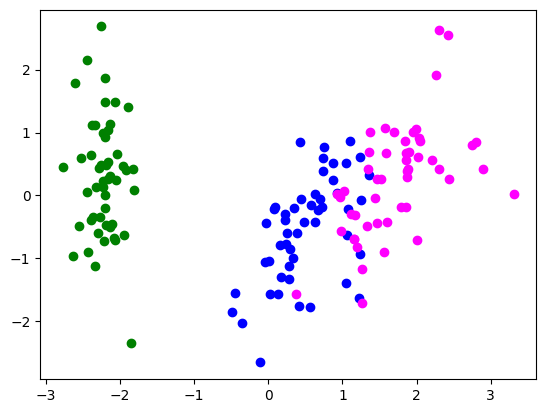

In [29]:
plt.scatter(Xpca[y==0,0],Xpca[y==0,1],color='green')
plt.scatter(Xpca[y==1,0],Xpca[y==1,1],color='blue')
plt.scatter(Xpca[y==2,0],Xpca[y==2,1],color='magenta')


# KNN classifier

(105, 4)
(45, 4)
[[14  1  0]
 [ 0 13  1]
 [ 0  2 14]]


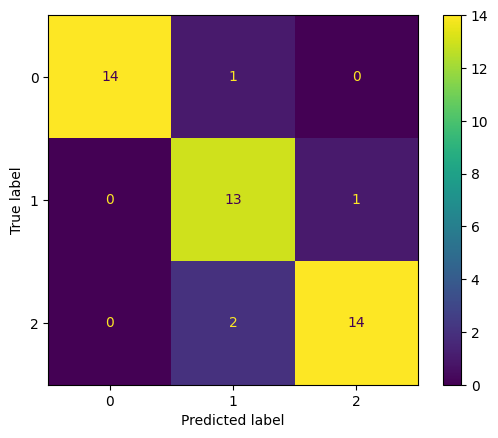

In [31]:

# Import train_test_split as in last PC lab, split X (original) into train and test, train KNN classifier on full 4-dimensional X
# Using Xpp KNN classifies based on the distance between points, and scaling the data improves feature comparability.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(Xpp, y, test_size=0.3)
print(X_train.shape)
print(X_test.shape)

knn1=KNeighborsClassifier(n_neighbors = 3) # Initialize the KNN classifier with k=3 (3 nearest neighbors)
knn1.fit(X_train,y_train) # Train the KNN classifier on the training set
Ypred=knn1.predict(X_test) # Predict the class labels for the test set
# Import and show confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print(confusion_matrix(y_test,Ypred))
ConfusionMatrixDisplay.from_predictions(y_test,Ypred) # Display the confusion matrix as a graphical representation



(105, 3)
(45, 3)
[[15  1  0]
 [ 0 13  2]
 [ 0  2 12]]


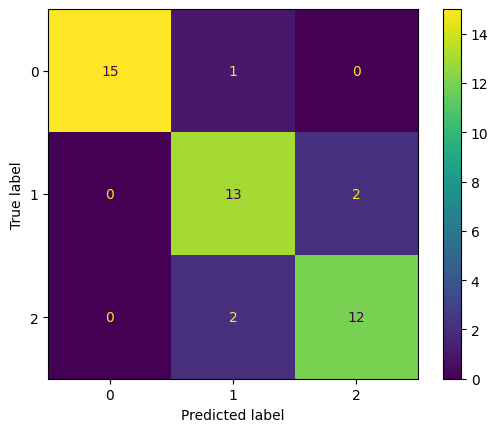

In [35]:
# Import train_test_split as in last PC lab, split X (original) into train and test, train KNN classifier on full 4-dimensional X
# Using PCA  reduces dimensionality while retaining most of the variance.
#Fewer dimensions can make KNN faster and more efficient, but it might lose some information

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xpca, y, test_size=0.3)
print(X_train.shape)
print(X_test.shape)

knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train,y_train)
Ypred=knn1.predict(X_test)
# Import and show confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print(confusion_matrix(y_test,Ypred))
ConfusionMatrixDisplay.from_predictions(y_test,Ypred)

(105, 2)
(45, 2)
[[ 7  5  2]
 [ 6  7  0]
 [10  3  5]]


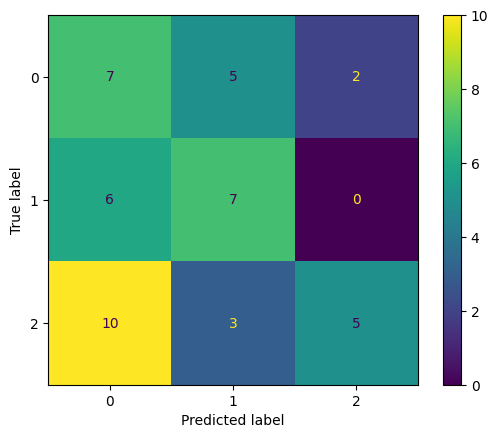

In [36]:
# Import train_test_split as in last PC lab, split X (original) into train and test, train KNN classifier on full 4-dimensional X
# Using Xpca[:, 1:3], This selects only the second and third principal components of the data.
# reduces the dimensionality even further (to 2 components), which might speed up computation but could also lose important variance.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xpca[:,1:3], y, test_size=0.3)
print(X_train.shape)
print(X_test.shape)

knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train,y_train)
Ypred=knn1.predict(X_test)
# Import and show confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print(confusion_matrix(y_test,Ypred))
ConfusionMatrixDisplay.from_predictions(y_test,Ypred)

(105, 2)
(45, 2)
[[11  1  0]
 [ 0 16  2]
 [ 0  2 13]]


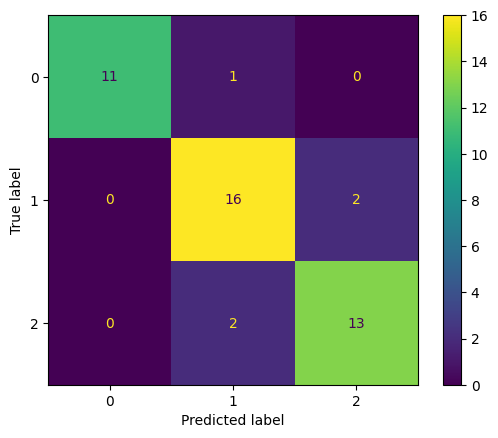

In [33]:
# Now do the same (data set split, KNN, confusion matrix), but for PCA-transformed data (1st two principal components, i.e., first two columns).
# Compare the results with full dataset
# We now are focusing on the most significant features while still retaining most of the variance captured by PCA
# However by discarding the third component, so the performance might slightly decrease.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xpca[:,0:2], y, test_size=0.3)
print(X_train.shape)
print(X_test.shape)

knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train,y_train)
Ypred=knn1.predict(X_test)
# Import and show confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print(confusion_matrix(y_test,Ypred))
ConfusionMatrixDisplay.from_predictions(y_test,Ypred)

(105, 2)
(45, 2)
[[13  1  0]
 [ 0  8  6]
 [ 0  4 13]]


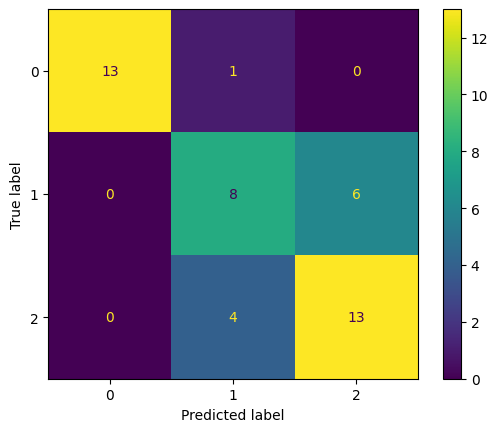

In [34]:
# Now do the same, but use only 2-dimensional data of original X (first two columns)
# We now are choosing the first two features of the dataset before applying any preprocessing or dimensionality reduction like PCA.
# This could result in lower classification performance compared to using PCA-transformed data because we're not capturing the relationships between features that might be important for classification.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X[:,0:2], y, test_size=0.3)
print(X_train.shape)
print(X_test.shape)

knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train,y_train)
Ypred=knn1.predict(X_test)
# Import and show confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print(confusion_matrix(y_test,Ypred))
ConfusionMatrixDisplay.from_predictions(y_test,Ypred)